In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from lls import LLS

In [2]:
data = pd.read_csv("C:/Users/Farhad/Desktop/python/Machine_Learning/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


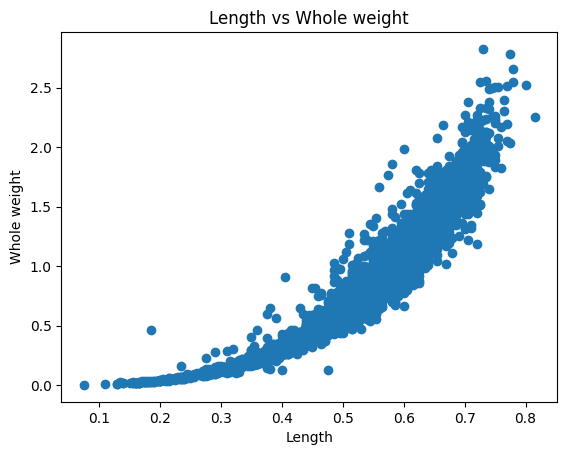

In [3]:
plt.scatter(data['Length'], data['Whole weight'])
plt.title("Length vs Whole weight")
plt.xlabel('Length')
plt.ylabel('Whole weight')
plt.show()

In [4]:
data["Sex"] = data["Sex"].replace(["F", "M", "I"],[0, 1, 2])
data["Sex"]

C:\Users\Farhad\AppData\Local\Temp\ipykernel_3332\3041648057.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Sex"] = data["Sex"].replace(["F", "M", "I"],[0, 1, 2])


0       1
1       1
2       0
3       1
4       2
       ..
4172    0
4173    1
4174    1
4175    0
4176    1
Name: Sex, Length: 4177, dtype: int64

In [5]:
# ماتریس همبستگی
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [6]:
data = data.drop(["Sex"], axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


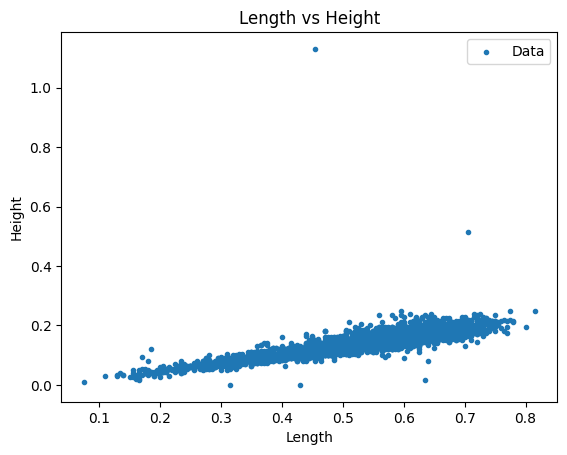

In [7]:
plt.scatter(data['Length'], data['Height'], marker='.')
plt.title("Length vs Height")
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['Data'])
plt.show()

In [8]:
X = np.array(data[["Length"]])
Y = np.array(data[["Height"]])

print(X.shape)
print(Y.shape)

(4177, 1)
(4177, 1)


In [9]:
X.T.shape

(1, 4177)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3132, 1)
(3132, 1)
(1045, 1)
(1045, 1)


In [11]:
lls = LLS()
lls.fit(X_train, Y_train)

Y_pred = lls.predict(X_test)

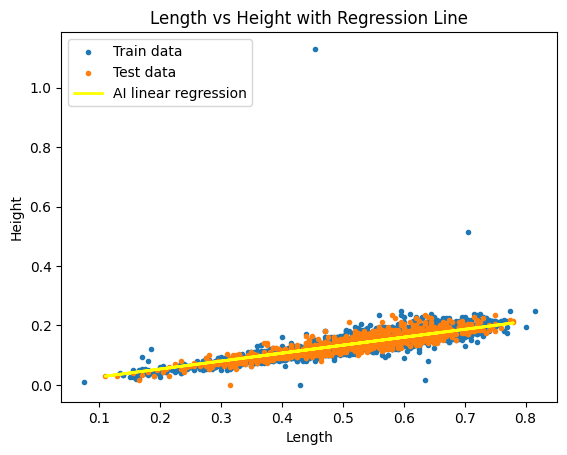

In [12]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, color='yellow', lw=2)
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Length vs Height with Regression Line')
plt.legend(["Train data","Test data","AI linear regression"], loc="upper left")
plt.show()

In [14]:
lls.evaluate(X_test, Y_test, "mae")


np.float64(0.012555208809224326)